<a href="https://colab.research.google.com/github/asfalanoij/rudyhp.github.io/blob/GCollabs/automation101_XML_instruktur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automation Rekap Skor WI

rudyhp, 2024

## 1. Install Selenium dan *ChromeDriver*

In [42]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 39 n

## 2. Configure Selenium to Use Headless Border

In [43]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')


## 3. Start a WebDriver Session

In [44]:
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Correct way to initialize the WebDriver with options
driver = webdriver.Chrome(options=chrome_options)


## 4. Selenium for Web Automation

In [45]:
driver.get("https://pusdiklatwas.bpkp.go.id/rekap-evaluasi/evainstruktur/view/01-01-2023/31-12-2023")
print(driver.page_source) # prints the page source


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



manual activity in Rekap Instruktur:
https://pusdiklatwas.bpkp.go.id/rekap-evaluasi/evainstruktur/view/01-01-2023/31-12-2023

based in the inspection, the location of Rekap Instruktur:
https://pusdiklatwas.bpkp.go.id/rekap-evaluasi/evainstruktur/rekap_excel



# 5. Web Scrapping Rekap instruktur

In [46]:
!pip install webdriver_manager


## Sukses atau Engga?
kalau hasil kode di bawah adalah ['.config', 'evaluasi_wi.xls', 'evaluasi_wi.xls.crdownload', 'sample_data']
artinya, evaluasi_wi.xls sudah terdonwload.

per 1/1/2024, yg nongol adalah data wi Jan-Des 2023. ukuran file 6.1Mb. sudah sama persis sepeerti download manual

running time memang lama,bisa 1 atau 2 menit.

In [47]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Set download preferences
prefs = {'download.default_directory' : '/content'}
chrome_options.add_experimental_option('prefs', prefs)

# Initialize WebDriver
driver = webdriver.Chrome(options=chrome_options)

# Navigate to the page
driver.get("https://pusdiklatwas.bpkp.go.id/rekap-evaluasi/evainstruktur/view/01-01-2023/31-12-2023")

# Locate the "Convert to Excel" button by its href attribute or class name
convert_to_excel_button = driver.find_element(By.CSS_SELECTOR, "a[href*='rekap_excel']")

# Click the "Convert to Excel" button
convert_to_excel_button.click()

# Wait for the download to finish (may need to adjust the time based on your network speed)
import time
time.sleep(100)  # Waits for 100 seconds

# Check the '/content' directory for the downloaded file
import os
downloaded_files = os.listdir('/content')
print(downloaded_files)

# Close the WebDriver
driver.quit()


['.config', 'evaluasi_wi.xls', 'evaluasi_wi.xls.crdownload', 'sample_data']


In [50]:
# Check the content of the downloaded file to see if it's HTML
file_path = '/content/evaluasi_wi.xls'  # Or whatever the downloaded file's name is

# Read the content of the file
with open(file_path, 'r') as file:
    content = file.read()

# Print the first 1000 characters to see what's in the file
print(content[:1000])


<!DOCTYPE html>
<html>
<head>
	<meta charset="UTF-8">
	<title> </title>


</head>
<body>




<div class='table-responsive'>
<table class='table table-bordered table-hover' id='tbl_kelemahan' border='0' cellspacing='0' cellpadding='2' style=''>
<tr class='cell_nomor' height='40' >
<td class='' align='center' style='width:40px !important;'><b>No</b></td>
<td class='' align='center' style=''><b>Id Kaldik</b></td>	
<td class='' align='center' style='width: 250px !important'><b>Instruktur /WI </b></td>	
<td class='' align='center' style='width: 250px !important'><b>Mata Ajar </b></td>	
<td class='' align='center' style='width: 250px !important'><b>Nama Diklat </b></td>
<td class='' align='center' style='width: 250px !important'><b>Lokasi</b></td>	
<td class='' align='center' style='width: 250px !important'><b>Tempat</b></td>			
<td class='' align='center' style=''><b>Jenis Diklat </b></td>	
<td class='' align='center' style='width: 100px'><b>Tgl Mulai</b></td>	
<td class='' align='center' s

In [53]:
file_path = '/content/evaluasi_wi.xls'

# Read the first part of the file to check its content
with open(file_path, 'rb') as file:
    content_head = file.read(100)  # Read first 100 bytes for inspection
    print(content_head)



b'<!DOCTYPE html>\r\n<html>\r\n<head>\r\n\t<meta charset="UTF-8">\r\n\t<title> </title>\r\n\r\n\r\n</head>\r\n<body>\r\n\r\n'


In [66]:
if content_head.startswith(b'<!DOCTYPE html>'):
    dfs = pd.read_html(file_path)
    print(dfs[0].head())  # Assuming the first table is the desired data


   0          1                  2   \
0  No  Id Kaldik     Instruktur /WI   
1   1   20230012  Agus Tri Prasetyo   
2   2   20230012  Agus Tri Prasetyo   
3   3   20230012  Agus Tri Prasetyo   
4   4   20230012      Mustofa Kamal   

                                                  3   \
0                                          Mata Ajar   
1                     Penyusunan Program Kerja Audit   
2             Identifikasi dan Evaluasi Pengendalian   
3  Perencanaan Audit Kinerja - Identifikasi dan P...   
4             Penyusunan Laporan Hasil Audit Kinerja   

                                                  4                  5   \
0                                        Nama Diklat             Lokasi   
1  Audit Kinerja Bagi APIP di Lingkungan Inspekto...  Pusdiklatwas BPKP   
2  Audit Kinerja Bagi APIP di Lingkungan Inspekto...  Pusdiklatwas BPKP   
3  Audit Kinerja Bagi APIP di Lingkungan Inspekto...  Pusdiklatwas BPKP   
4  Audit Kinerja Bagi APIP di Lingkungan Inspekto... 

In [70]:
# Assuming 'dfs' is your list of DataFrames and the first DataFrame is the one you want to work with
df = dfs[0]

# Print the first few rows to verify
print(df.head())


   0          1                  2   \
0  No  Id Kaldik     Instruktur /WI   
1   1   20230012  Agus Tri Prasetyo   
2   2   20230012  Agus Tri Prasetyo   
3   3   20230012  Agus Tri Prasetyo   
4   4   20230012      Mustofa Kamal   

                                                  3   \
0                                          Mata Ajar   
1                     Penyusunan Program Kerja Audit   
2             Identifikasi dan Evaluasi Pengendalian   
3  Perencanaan Audit Kinerja - Identifikasi dan P...   
4             Penyusunan Laporan Hasil Audit Kinerja   

                                                  4                  5   \
0                                        Nama Diklat             Lokasi   
1  Audit Kinerja Bagi APIP di Lingkungan Inspekto...  Pusdiklatwas BPKP   
2  Audit Kinerja Bagi APIP di Lingkungan Inspekto...  Pusdiklatwas BPKP   
3  Audit Kinerja Bagi APIP di Lingkungan Inspekto...  Pusdiklatwas BPKP   
4  Audit Kinerja Bagi APIP di Lingkungan Inspekto... 

In [69]:

# Assuming 'your_list' is the variable containing your data
the_list = dfs


# Create a DataFrame, using the first sub-list as the header
df = pd.DataFrame(the_list[1:], columns=your_list[0])

# Display the first few rows of the DataFrame to verify
print(df.head())


Empty DataFrame
Columns: [(No, Id Kaldik, Instruktur /WI, Mata Ajar, Nama Diklat, Lokasi, Tempat, Jenis Diklat, Tgl Mulai, Tgl Selesai, Kelas, Jumlah Peserta, P01, P02, P03, P04, Rata2), (1, 20230012, Agus Tri Prasetyo, Penyusunan Program Kerja Audit, Audit Kinerja Bagi APIP di Lingkungan Inspektorat Jenderal kementerian Perhubungan, Pusdiklatwas BPKP, Pusdiklatwas BPKP, Gedung B, Ruang 302, TS SPIP, 09 Jan 2023, 13 Jan 2023, nan, 25, 4.36, 4.24, 4.24, 4.36, 4.30), (2, 20230012, Agus Tri Prasetyo, Identifikasi dan Evaluasi Pengendalian, Audit Kinerja Bagi APIP di Lingkungan Inspektorat Jenderal kementerian Perhubungan, Pusdiklatwas BPKP, Pusdiklatwas BPKP, Gedung B, Ruang 302, TS SPIP, 09 Jan 2023, 13 Jan 2023, nan, 25, 4.40, 4.24, 4.36, 4.36, 4.34), (3, 20230012, Agus Tri Prasetyo, Perencanaan Audit Kinerja - Identifikasi dan Penilaian Risiko, Audit Kinerja Bagi APIP di Lingkungan Inspektorat Jenderal kementerian Perhubungan, Pusdiklatwas BPKP, Pusdiklatwas BPKP, Gedung B, Ruang 302, 

In [96]:
# Convert score columns to numeric
score_columns = df.columns[12:]  # Adjust indices if needed
for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group by 'Instruktur / WI' and calculate the mean for each group
grouped_df = df.groupby(df.columns[2], as_index=False)[score_columns].mean()

# Rename columns for clarity (optional)
column_names = {
    df.columns[1]: 'Nama Instruktur',
    df.columns[12]: 'Penguasaan Materi',
    df.columns[13]: 'Transfer of Knowledge',
    df.columns[14]: 'Komunikasi dan Motivasi',
    df.columns[15]: 'Diskusi dan Latihan',
    df.columns[16]: 'Rata2'
}
grouped_df.rename(columns=column_names, inplace=True)

# Rename the header '2' to 'Nama Instruktur/WI'
grouped_df.rename(columns={grouped_df.columns[0]: 'Nama Instruktur/WI'}, inplace=True)

# Display the grouped DataFrame
print(grouped_df)


                      Nama Instruktur/WI  Penguasaan Materi  \
0                  A.M. Firman Dwi Putra              4.350   
1                 ACFE Indonesia Chapter              4.550   
2                            Aang Ismail              4.570   
3                    Abdi Prasetiya Nusa              4.765   
4                   Abdizil Ikhram Lubis              4.860   
...                                  ...                ...   
1045           Zulfah Feba Nurul Abdilla              4.650   
1046                   Zulfitra Ramadana              4.705   
1047                     Zulhadi Saputra              4.265   
1048  Zuni Asih Nurhidayati, S.T., M.Sc.              4.730   
1049    dr. M Afiful Jauhani (LSP Jumly)              4.715   

      Transfer of Knowledge  Komunikasi dan Motivasi  Diskusi dan Latihan  \
0                   4.27500                  4.31250             4.305000   
1                   4.55000                  4.45000             4.383333   
2           

Combobox(value='Totok Prihantoro', description='Instructor:', ensure_option=True, options=('A.M. Firman Dwi Pu…

Button(description='Submit', style=ButtonStyle(), tooltip='Click to submit')

,Nama Instruktur/WI,Penguasaan Materi,Transfer of Knowledge,Komunikasi dan Motivasi,Diskusi dan Latihan,Rata2
959,Totok Prihantoro,4.757143,4.696667,4.670476,4.647619,4.692857


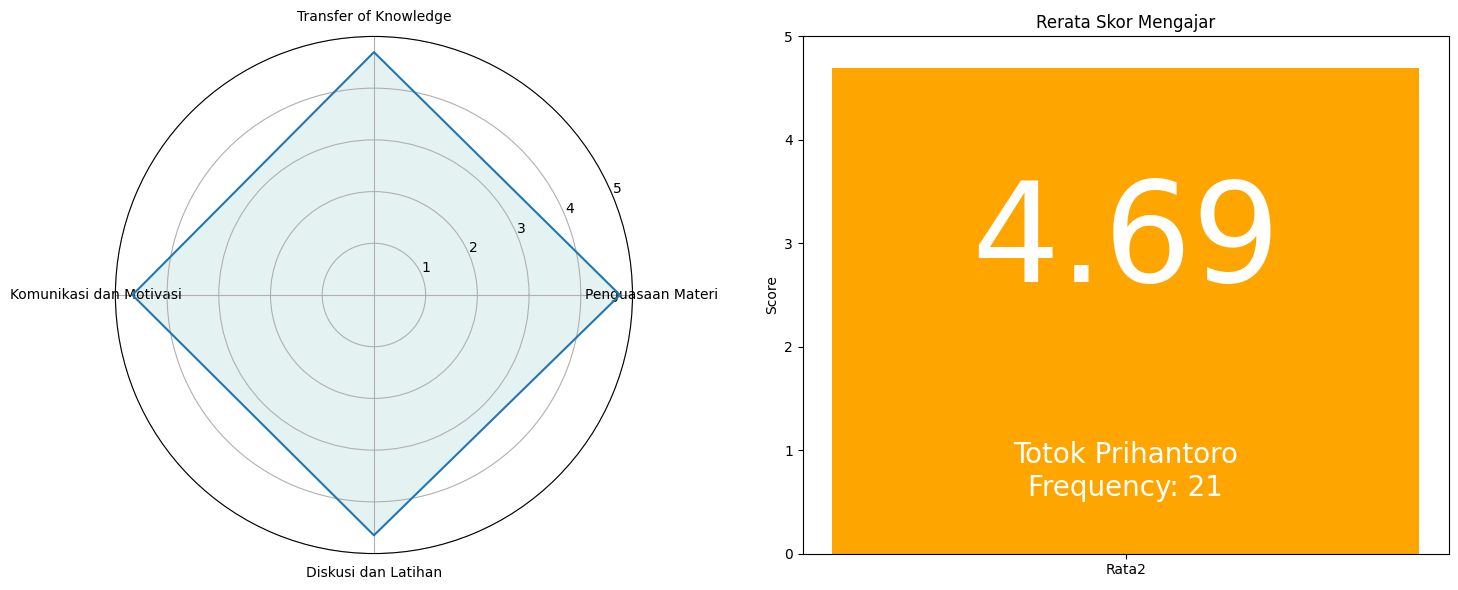

In [115]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from math import pi

# Assuming 'grouped_df' is your DataFrame after all processing

# Create a dropdown widget with all instructor names
instructor_dropdown = widgets.Combobox(
    options = sorted(grouped_df[grouped_df.columns[0]].unique()),
    description = 'Instructor:',
    ensure_option = True,
    disabled = False,
)

# Create a submit button
submit_button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='',
    tooltip='Click to submit',
)

# Define a function to process and display data upon submission
def on_submit_clicked(b):
    selected_instructor = instructor_dropdown.value
    if selected_instructor in grouped_df[grouped_df.columns[0]].values:
        filtered_df = grouped_df[grouped_df[grouped_df.columns[0]] == selected_instructor]

        # Get the frequency of the instructor's appearance
        instructor_frequency = df[df[df.columns[2]] == selected_instructor].shape[0]

        # Radar chart (excluding 'Rata2')
        categories = ['Penguasaan Materi', 'Transfer of Knowledge', 'Komunikasi dan Motivasi', 'Diskusi dan Latihan']
        values = filtered_df[categories].values.flatten().tolist()
        values += values[:1]  # repeat the first value to close the circular graph

        angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
        angles += angles[:1]

        # Setup figure and axis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Radar chart on ax1
        ax1 = plt.subplot(121, polar=True)
        ax1.plot(angles, values)
        ax1.fill(angles, values, 'teal', alpha=0.1)
        ax1.set_xticks(angles[:-1])
        ax1.set_xticklabels(categories)
        ax1.set_ylim(0, 5)

        # Bar chart for 'Rata2' score on ax2
        ax2 = plt.subplot(122)
        rata2_score = filtered_df['Rata2'].values[0]
        bar = ax2.bar('Rata2', rata2_score, color='orange')
        ax2.set_ylim(0, 5)
        ax2.set_ylabel('Score')
        ax2.set_title('Rerata Skor Mengajar')

        # Add text inside the bar
        ax2.text(bar[0].get_x() + bar[0].get_width() / 2, rata2_score / 2, f'{rata2_score:.2f}', ha='center', va='bottom', color='white', fontsize=100)

        # Add instructor name and frequency below the bar
        ax2.text(0.5, 0.1, f'{selected_instructor}\nFrequency: {instructor_frequency}', ha='center', va='bottom', color='white', transform=ax2.transAxes, fontsize=20)

        clear_output(wait=True)
        display(instructor_dropdown, submit_button)
        display(filtered_df)
        plt.tight_layout()
        plt.show()
    else:
        clear_output(wait=True)
        display(instructor_dropdown, submit_button)
        print("Instructor not found. Please try again.")

# Bind the button click event to the function
submit_button.on_click(on_submit_clicked)

# Display the widgets
display(instructor_dropdown, submit_button)
